In [1]:
from IPython.core.display import HTML as Center

Center(
""" 
<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style> 
""")

$
\newcommand{\nc}{\newcommand} 
\nc{\t}{\text}
\nc{\tb}{\textbf}
\nc{\ti}{\textit}
\nc{\x}{\boldsymbol{x}}
\nc{\y}{\boldsymbol{y}}
\nc{\z}{\boldsymbol{z}}
$

# $$\textbf{Python Programming for Machine Learning} $$ 

#### $$\text{Winter Semester 2021/2022}$$

#### $$\text{Sergej Dogadov and Panagiotis Tomer Karagianis}$$

<center>
<img src='images/pyt.png' width=450>

# $$\textbf{Package for scientific computing}$$
<hr>
<br>
<center>
<img src='images/num.png' width=850>
</center>    


### $\textbf{Usefull options:}$

* $\text{a powerful }N\text{-dimensional array object}$
* $\text{sophisticated (broadcasting) functions}$
* $\text{linear algebra, Fourier transform and random number capabilities.}$

* $\text{Import the package in order to use the built-in functionality} $


In [2]:
# conda install -c anaconda numpy

import numpy as np # as alias or better to say a shortcut 


## $$\textbf{NumPy arrays and data types}$$
<hr>

* $\text{Create a powerful } N-\text{dimensional } NumPy \text{ array object}$

In [3]:
# from a list
X = np.array([1, 2, 3, 4])

X, type(X) 


(array([1, 2, 3, 4]), numpy.ndarray)

In [4]:
# from a tuple
Y = np.array((1, 2.0, 3, 4))

Y, type(Y)


(array([1., 2., 3., 4.]), numpy.ndarray)

* $\text{Data type inside the object is automatically determined from the inputs}$

In [5]:
Z = np.array(range(2,10,2)) # from range generator object

print(Z, Z.dtype) # double precision integer
print(Y, Y.dtype) # double precision float


[2 4 6 8] int32
[1. 2. 3. 4.] float64


## $$\textbf{NumPy data casting}$$
<hr>

* $\text{Data type can be changed either explicitly to be e.g}\> \textit{(float64)}\> \text{as following:}$

In [6]:
X = X.astype(np.float64)
print(X, X.dtype) # double precision float

X = X.astype(np.int32)
print(X, X.dtype) # double precision float

X = X.astype(np.str) # element-wise to string casting
print(X, X.dtype)


[1. 2. 3. 4.] float64
[1 2 3 4] int32
['1' '2' '3' '4'] <U11


C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_4148/3523527644.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.str) # element-wise to string casting


* $\text{or specified during the creation.}$

In [7]:
X = np.array([1, -2.9, 3, 4], dtype=np.int32) # single precision integer

X.dtype, X # but be careful (casting errors)


(dtype('int32'), array([ 1, -2,  3,  4]))

* $\text{When applying an operator to two arrays of different types,}$
$\text{the returned array gets the type of the highest-precision input array}$

In [8]:
(X + Y).dtype


dtype('float64')

 ## $$\textbf{Operations between NumPy arrays}$$
<hr>

 * $\text{Element-wise addition}$

In [9]:
print(X, Y)

A = X + Y   
A, A.dtype


[ 1 -2  3  4] [1. 2. 3. 4.]


(array([2., 0., 6., 8.]), dtype('float64'))

 * $\text{Element-wise multiplication}$

In [10]:
M = X * Y   
M, M.dtype


(array([ 1., -4.,  9., 16.]), dtype('float64'))

 * $\text{Element-wise power}$

In [11]:
M = X ** Y   
M, M.dtype


(array([  1.,   4.,  27., 256.]), dtype('float64'))

 ## $$\textbf{Indexing and Slicing}$$
<hr>

In [12]:
# Similar indexind and slicing to already well known python lists

X_tail = X[2:]   # indexing 
X_slice = X[1:4] # slicing
X_even = X[1::2]  # use steps e.g. for getting even elements
X_rev = X[::-1]  # reverce

print("X:", X)
print("X_tail:" , X_tail)
print("X_slice:", X_slice) 
print("X_even:", X_even)
print("X_rev:", X_rev)


X: [ 1 -2  3  4]
X_tail: [3 4]
X_slice: [-2  3  4]
X_even: [-2  4]
X_rev: [ 4  3 -2  1]


 ## $$\textbf{Python vs. NumPy}$$
<hr>

In [13]:
X_list = [1, 2, 3, 4]
Y_list = [5, 6, 7, 8]

# concatenation
X_list + Y_list 


[1, 2, 3, 4, 5, 6, 7, 8]

In [14]:
X_arr = np.array(X_list)
Y_arr = np.array([5, 6, 7, 8])

# element-wise (operation) addition
X_arr + Y_arr 

array([ 6,  8, 10, 12])

In [15]:
X_list * Y_list # not defined for lists -> compiler raises an Exception

TypeError: can't multiply sequence by non-int of type 'list'

* $\text{Element-wise operations in pure Python with a list comprehansion}$

In [16]:
print(X_list, "+", Y_list)

# element-wise addition
A_list = [x + y for (x, y) in zip(X_list, Y_list)]

A_arr = X_arr + Y_arr

print(A_list,'=', A_arr)

assert np.allclose(A_list, A_arr), "Elements of the arrays don't match."


[1, 2, 3, 4] + [5, 6, 7, 8]
[6, 8, 10, 12] = [ 6  8 10 12]


In [17]:
# element-wise multiplication
M_list = [x * y for x, y in zip(X_list, Y_list)]      

M_arr = X_arr * Y_arr
print(M_list, M_arr)


[5, 12, 21, 32] [ 5 12 21 32]


$\textbf{Observation:} \text{ Results are the same, but the Numpy syntax is much more readable }$

$\text{(i.e. more compact) than the Python syntax for the same vector operations.}$

 ## $$\textbf{NumPy array  (Vector)}$$
<hr>

In [18]:
vec = np.array([1, 2, 3]) # simple array or vector
vec, vec.shape, type(vec)


(array([1, 2, 3]), (3,), numpy.ndarray)

In [19]:
# Adding a dimension
vec_row = vec[np.newaxis] # row vector ( equivalent vec[None])

vec_row, vec_row.shape


(array([[1, 2, 3]]), (1, 3))

In [20]:
vec_col = vec[:, None] # column vector (None is used instead of np.newaxis)
vec_col, vec_col.shape, vec_col.size


(array([[1],
        [2],
        [3]]),
 (3, 1),
 3)

 ## $$\textbf{NumPy 2-dim array  (Matrix)}$$
<hr>

In [21]:
# 2-dim array from list of the lists
A = [
        [1, 2, 3],
        [4, 5, 6]
    ]

A = np.array(A)

print(A)
print(type(A))

# matrix dimensions and number of elements
if isinstance(A, np.ndarray):
    print(A.shape, A.size)


[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
(2, 3) 6


 * $\text{Matrix-Matrix dot product}$

In [22]:
#(2, 3) x (3, 2) -> (2, 2)

A2 = A.dot(A.T) # T -> matrix transpose operation

#A2 = np.dot(A, np.transpose(A)) # equivalent with casting to ndarray object

#A2 = A @ A.T # equivalent works in python versions > 3.4

print(A2, A2.shape)


[[14 32]
 [32 77]] (2, 2)


 ## $$ \textbf{NumPy}\> N\textbf{-dim array (Tensor)}$$
<hr>

* $\text{N-dim array creation useful functions}$

In [23]:
# All zeros with the given shape
A_zeros = np.zeros(shape=(2, 3, 2))
A_zeros.shape

(2, 3, 2)

In [24]:


# All ones with the given shape
A_ones = np.ones((3,2,2)) # you may omit 'shape=' argument name 

A_ones, A_ones.shape 


(array([[[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]],
 
        [[1., 1.],
         [1., 1.]]]),
 (3, 2, 2))

In [25]:
A_ones = np.ones_like(A) # takes shape from A

print(A.shape)
A_ones, A_ones.ndim # number of dimensions (axis)


(2, 3)


(array([[1, 1, 1],
        [1, 1, 1]]),
 2)

 ## $$ N\textbf{-d array reshaping}$$
<hr>

In [26]:
# Init numpy array 
A = np.arange(2, 49, 2) # numpy equlavent of the range function

print(A, type(A), len(A))


[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48] <class 'numpy.ndarray'> 24


In [27]:
new_shape = (2, 3, 4)

A_t = A.reshape(new_shape) # or resise(2,4,3) manipulates the original array

assert len(A) == np.prod(new_shape)
print(A_t)

A_t.shape , A_t.ndim


[[[ 2  4  6  8]
  [10 12 14 16]
  [18 20 22 24]]

 [[26 28 30 32]
  [34 36 38 40]
  [42 44 46 48]]]


((2, 3, 4), 3)

 ## $$ N\textbf{-d array indexing}$$
<hr>

In [28]:
 # sub-matrix indexing # (2,3,4)
print(A_t[1]) # first sub-matrix


[[26 28 30 32]
 [34 36 38 40]
 [42 44 46 48]]


In [29]:
# slicing within the second sub-matrix 
print(A_t[1, 1:3])


[[34 36 38 40]
 [42 44 46 48]]


In [30]:
# last column vecotor within second sub-matrix
print(A_t[1, :, -1])  # : sign skips one dimension (axis)

#print(A_t, A_t.ndim)


[32 40 48]


In [31]:
A_t[1, 1::2] # even rows of second sub-matrix


array([[34, 36, 38, 40]])

 ## $$ \textbf{NumPy boolean arrays}$$
<hr>

In [32]:
import numpy as np

a = np.arange(8) - 3
print(a)

greater_one = a > 1

print(greater_one.dtype)
print(greater_one)

a[greater_one]


[-3 -2 -1  0  1  2  3  4]
bool
[False False False False False  True  True  True]


array([2, 3, 4])

* $\text{Element-wise boolean operations}$

In [33]:
lower_minus_one = a < -1
mask = lower_minus_one + greater_one  # either lower then -1 or greater then 1 

# Equiv.
#mask = np.logical_or(lower_minus_one, greater_one)
print(mask)
a[mask]


[ True  True False False False  True  True  True]


array([-3, -2,  2,  3,  4])

 ## $$ \textbf{NumPy boolean functions}$$
<hr>

In [34]:
print(a)
np.all(a < 1)


[-3 -2 -1  0  1  2  3  4]


False

In [35]:
print((a >= -3) * (a < 5))

np.all((a >= -3) * (a < 5)) # are all elements greater equal then -3 and lower then 5


[ True  True  True  True  True  True  True  True]


True

In [36]:
((a > 3) * (a < 5)).all() # are all elements greater then -3 and lower then 5


False

In [37]:
(a > 3).any() # works similarly (one True is enough to get True returned)


True

 ## $$ \textbf{NumPy boolean functions applied along axis}$$
<hr>

In [38]:
# First let's construct a matrix from array
print(a)


[-3 -2 -1  0  1  2  3  4]


In [39]:
A = a.reshape(-1, 4) # second axis must have 4 elements, the others detrimined automatically
A, A.shape


(array([[-3, -2, -1,  0],
        [ 1,  2,  3,  4]]),
 (2, 4))

In [40]:
# specify 'collapsing' axis
ans = np.all(A > -2, axis=0) # are all elements greather then -2 column-wise
ans, ans.shape


(array([False, False,  True,  True]), (4,))

In [41]:
ans = np.all(A > 0, axis=1, keepdims=True) # are all elements positive row-wise (keppdims prevents shape squeezing)
ans, ans.shape


(array([[False],
        [ True]]),
 (2, 1))

 ## $$ \textbf{Some useful NumPy functions}$$
<hr>

In [42]:
C = np.arange(24).astype(np.float)

# summe, average, standart deviation, variance
np.sum(C), np.mean(C), np.std(C), np.var(C) # etc...


C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_4148/2652278213.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C = np.arange(24).astype(np.float)


(276.0, 11.5, 6.922186552431729, 47.916666666666664)

In [43]:


C.resize((4,6))
print(C, C.shape)

# It works along an axis as well
R = np.mean(C, axis=1) # row-wise average
R, R.shape

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]] (4, 6)


(array([ 2.5,  8.5, 14.5, 20.5]), (4,))

In [44]:
C.var(1) # row-wise variance (applied to C and 'axis=' omited)


array([2.91666667, 2.91666667, 2.91666667, 2.91666667])

 ## $$ \textbf{Broadcasting}$$
<hr>
<center>
<img src='./images/broad.png' width='1000'>


 ## $$ \textbf{Explicit broadcasting}$$
<hr>

In [45]:
A = 10 * np.arange(4)
print(A, A.shape)

A = A[None]
print(A.shape)

A = np.repeat(A, 3, axis=0).T # repeat row-wise 3 times then transpose
A, A.shape

[ 0 10 20 30] (4,)
(1, 4)


(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]),
 (4, 3))

In [46]:
B = np.arange(3)
print(B)

B = B[None]
B = np.repeat(B, 4, axis=0) # repeat row-wise 4 times
B, B.shape

[0 1 2]


(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 (4, 3))

In [47]:
#(4,3) + (4,3)
C = A + B
C, C.shape

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 (4, 3))

 ## $$ \textbf{Implicit broadcasting}$$
<hr>

In [48]:
A, A.shape

(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]),
 (4, 3))

In [49]:
B = np.array([0,1,2])[None]
B, B.shape

(array([[0, 1, 2]]), (1, 3))

In [50]:
#(4, 3) + (1, 3) -> (4,3) copied automatically 4 times to become (4,3)

A + B

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

 ## $$ \textbf{Implicit broadcasting}$$
<hr>

In [51]:
A = np.array([0,10,20,30])
B = np.array([0,1,2])

print(A.shape, B.shape)
A, B

(4,) (3,)


(array([ 0, 10, 20, 30]), array([0, 1, 2]))

In [52]:
A + B

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [53]:
# (4, 1) + (1, 3) => (4, 1 -> 3) + (1 -> 4 ,3) => (4,3) + (4,3) 

(A[:,None] + B[None]).shape

(4, 3)

<a href='https://numpy.org/doc/stable/user/basics.broadcasting.html?highlight=broadcasting#module-numpy.doc.broadcasting'>More about broadcasting</a>

 # $$ \textbf{Python vs. NumPy performance evaluation}$$
<hr> 
<br><br>
<div>
$\text{To verify that in addition to the more compact syntax,}$ 

$\text{Numpy also provides a computational benefit over standard Python,}$ 

$\text{we compare the running time of a similar computation performed in pure Python and in Numpy.}$
</div>

* $\text{Let's write a function to measure the computation time }$
$\text{of a matrix dot product for two}\> n \times n \>  \text{matrices.}$

* $\text{First define a function to initialize } n \times n \t{ matrices}$

In [54]:

def init_(n):
    
    # only initialization is made with numpy (time of the operation is not preserved)
    X = np.ones((n, n))
    Y = np.copy(X) # creates a copy of the given matrix
    Z = np.empty((n, n)) # placeholder matrix with values to be overwritten anyways
    
    return X, Y, Z

 # $$ \textbf{Pure Python implementation}$$
<hr> 


In [55]:
from time import time
import numpy as np


def benchmark_py(n):
    
    X, Y, Z = init_(n)
    
    def dot_(X, Y, Z):
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    Z[i,j] += X[i, k] * Y[k, j]
        return Z
    # actual (measured) matrix multiplication
    st = time()
    Z  = dot_(X, Y, Z)
    time_in_ms = time() - st
    
    return time_in_ms

In [56]:
comp_time_py = benchmark_py(128)
comp_time_py

1.3833496570587158

 # $$ \textbf{Numpy implementation}$$
<hr> 

In [57]:
def benchmark_np(n):
    
    X, Y, Z = init_(n)
    def dot_(X, Y, Z):
        Z = X @ Y # @ is a shortcut for np.dot 
        return Z
    
    st = time()
    Z  = dot_(X, Y, Z)
    time_in_ms = time() - st
     
    return time_in_ms

In [58]:
comp_time_np = benchmark_np(128)
comp_time_np

0.04030895233154297

In [59]:
ratio = comp_time_py/comp_time_np
f'NumPy is {ratio:0.0f} times faster then pure Python'

'NumPy is 34 times faster then pure Python'

* $\text{Let's collect the computation time for different matrix size parameters}$

In [60]:
max_power = 7
sizes =  2 ** np.arange(1, max_power+1)
sizes

array([  2,   4,   8,  16,  32,  64, 128], dtype=int32)

In [61]:
# Python computational times
py_t = [benchmark_py(size) for size in sizes]

In [62]:
np_t = [benchmark_np(size) for size in sizes]

In [63]:
ratios = np.divide(py_t,np_t)

print('Times Numpy is faster then pure Python:')
for n, t in zip(sizes, [ f'{r:0.4f}' for r in ratios]):
    print(f"Size {n:3d}: times: {t}")

Times Numpy is faster then pure Python:
Size   2: times: 0.0000
Size   4: times: nan
Size   8: times: inf
Size  16: times: inf
Size  32: times: 673.9580
Size  64: times: inf
Size 128: times: 1613.4989


C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_4148/3139370534.py:1: RuntimeWarning: divide by zero encountered in true_divide
  ratios = np.divide(py_t,np_t)
C:\Users\INGIMA~1\AppData\Local\Temp/ipykernel_4148/3139370534.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratios = np.divide(py_t,np_t)


 # $$ \textbf{Scientific plotting}$$
<hr> 
<br>

$\text{In machine learning, it is often necessary to visualize the data,}$ 

$\text{or to plot properties of algorithms such as their accuracy or their computation time.}$  

<br><br>
<center>
<img src='./images/mat.png' width='800'>

$\text{For this, we can make use of the}\> \textit{matplotlib}\> \text{library.}$

In [64]:
#conda install -c conda-forge matplotlib

import matplotlib.pyplot as plt # import plotting subpackage

# only for Jupyter Notebook
%matplotlib inline 

* $\text{Let's first create some input data for plotting}$

In [65]:
# Trigonometric functions data
import numpy as np

x = np.arange(0, 4*np.pi, 0.25) # similar to range function from pure Python

# elementwise sinus and cosinus functions
y = np.sin(x) 
z = np.cos(x)

print(x, x.shape, y.shape, z.shape)

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5 ] (51,) (51,) (51,)


 ## $$ \textbf{Basic plot}$$
<hr> 
<br>

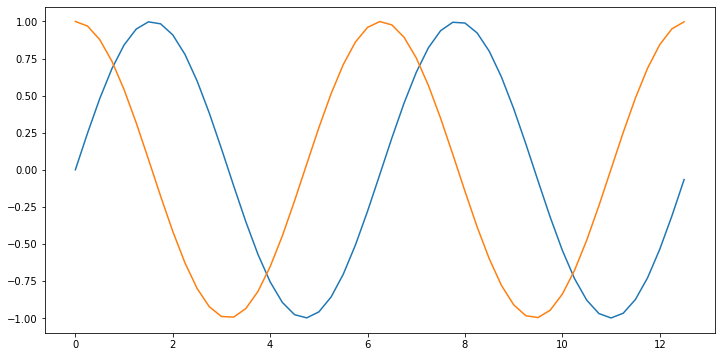

In [66]:
# figure proportions (sizes)
plt.figure(figsize=(12, 6))

plt.plot(x, y)
plt.plot(x, z); #; skips the plot object representaion printing


 ## $$ \textbf{Markers, Labels and Title}$$
<hr> 
<br>

In [ ]:
plt.figure(figsize=(12,6))

# connected circles marker style
plt.plot(x, y, 'o-', color='red', ms=10) # marker shortcut (o-) connected circles + color

# connected stars   
plt.plot(x, z, '*--', ms=15)  # (*--) stars with dashed line connection + size of the markers

plt.xlabel('x', fontsize=20) # x-axis label + fontsize
plt.ylabel('f(x)', fontsize=20, rotation=0, labelpad=20) # y-axis label + rotation angle (default 90 degree)

plt.title('Simple trigonometric functions', fontsize=25) #; skips printing the plot object representation


 ## $$ \textbf{Legend, Ticks and Grids}$$
<hr> 
<br>

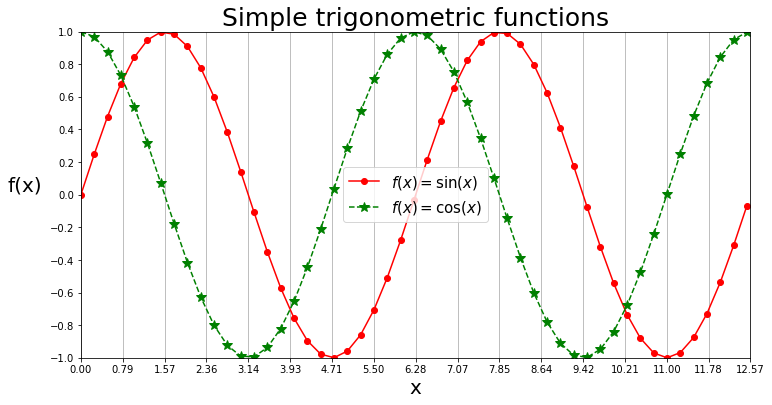

In [67]:
# figure proportions (sizes)
plt.figure(figsize=(12,6))

# connected circles marker style
plt.plot(x, y, 'o-', color='red', label='$f(x) = \sin(x)$') # LaTex expressions for the line labeling

# connected stars 
plt.plot(x, z, '*--', color='green', label='$f(x) = \cos(x)$', ms=10) 

plt.ylim(-1,1) # sets axis limits
plt.xlim(0, 4*np.pi)

plt.legend(loc='best', fontsize=15) # trigger the legend creation with the specified location + fontsize

plt.xlabel('x', fontsize=20) # fontsize
plt.ylabel('f(x)', fontsize=20, rotation=0, labelpad=25) # lable rotation angle (default 90 degree)

plt.yticks(np.arange(-1, 1.01, .2 ) ) # from -1 to 1 every 0.2 is a tick
plt.xticks(np.arange(0, 4*np.pi+0.01, np.pi/4)) # from 0 to 4 pi every pi/4 is a tick

plt.title('Simple trigonometric functions', fontsize=25)

plt.grid(axis='x') # grid lines

 ## $$ \textbf{Performance curves for matrix multiplication}$$
<hr> 
<br>

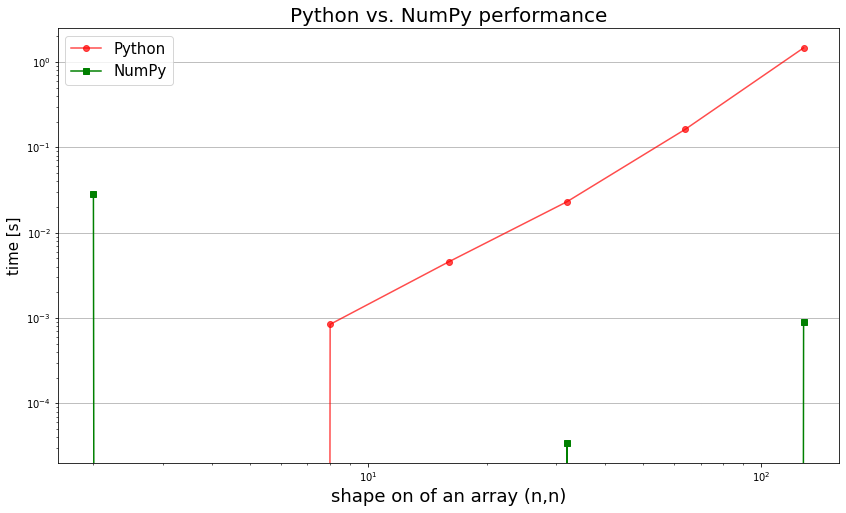

In [68]:
plt.figure(figsize=(14, 8))
plt.plot(sizes, py_t, 'o-', label='Python', color='red', alpha=0.7) # alpha for the transparency value
plt.plot(sizes, np_t, 's-', label='NumPy', color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('shape on of an array (n,n)', fontsize=18)
plt.ylabel('time [s]', fontsize=15)
plt.title('Python vs. NumPy performance', fontsize=20)

plt.grid(axis='y') # grid with along an y axis

plt.legend(loc='upper left', fontsize=15);

# $$ \textbf{Thank you for your attention.}$$